In [1]:
!pip install openpyxl

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.colors as mcolors
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
dataset_path = 'Datasets/Dataset_BA1B.xlsx'

df = pd.read_excel(dataset_path)
# df.dropna(inplace=True)
# df['TOP_DEPTH'].fillna(method='ffill', inplace=True)
[c for c in df.columns]
geology_columns = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
'TOP_DEPTH'
 # 'UNIT_CLASS_OPHIO',
 # 'UNIT_CLASS_UND',
                  ]

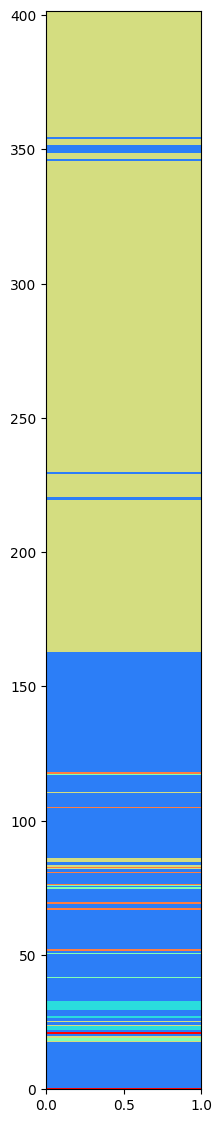

In [4]:
fig, ax = plt.subplots(figsize=(2, 14))
geo_df = df[geology_columns].copy()
geo_df.dropna(inplace=True)

Zs = []

for n, c in enumerate(geology_columns[:-1]):
    n = n + 1
    z = np.vstack(geo_df[c].values*n)
    Zs.append(z)

Z = np.zeros_like(z)
for z in Zs:
    Z += z
    
x = np.array([0, 1])
y = np.vstack(geo_df['TOP_DEPTH'].values)
xx, yy = np.meshgrid(x, y)
    
ax.pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')

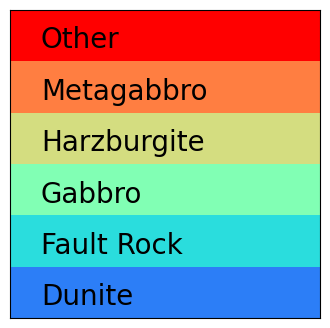

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(np.vstack([1, 2, 3, 4, 5, 6]), cmap='rainbow', vmin=0, vmax=6)
ax.text(s='Dunite', x=0.1, y=0.25, fontsize=20)
ax.text(s='Fault Rock', x=0.1, y=1.25, fontsize=20)
ax.text(s='Gabbro', x=0.1, y=2.25, fontsize=20)
ax.text(s='Harzburgite', x=0.1, y=3.25, fontsize=20)
ax.text(s='Metagabbro', x=0.1, y=4.25, fontsize=20)
ax.text(s='Other', x=0.1, y=5.25, fontsize=20)
# ax.set_xlim(0, 0.6)
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('geology_legend.pdf', bbox_inches='tight')

In [6]:
[c for c in df.columns]

['CORE',
 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 'SECTION_UNIT',
 '% of fractures',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 'Alterat

# Figure 2
*NOTE: figure 1 is a process diagram*

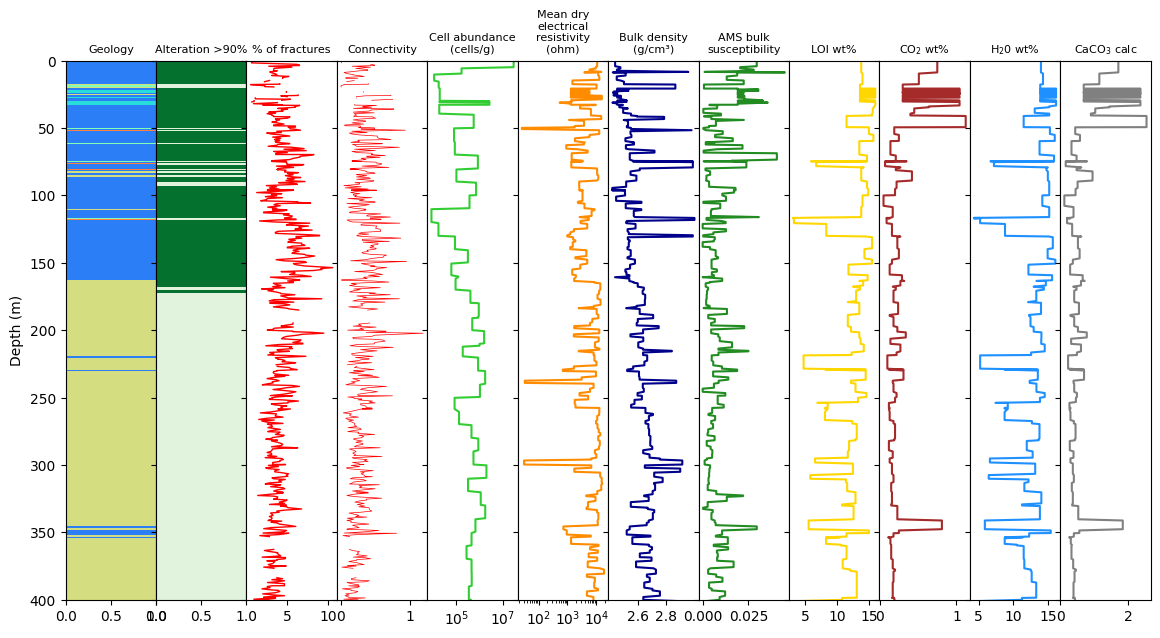

In [7]:
fig2_cols = ['Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'% of fractures',
'TOP_DEPTH',
'ALTERATION',
'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
'Alteration_dummies_50%-90%',
 'Alteration_dummies_>90%',]

connectivity = ['PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]

fig2_df = df[fig2_cols].copy()
fig2_df.sort_values(by='TOP_DEPTH', inplace=True)
fig, ax = plt.subplots(1, 12, figsize=(14, 7), sharey=True)

y = fig2_df.TOP_DEPTH
   
ax[0].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')
ax[0].set_title('Geology', fontsize=8)

alt_df = fig2_df[['Alteration_dummies_>90%', 'TOP_DEPTH']].copy()
alt_df.dropna(inplace=True)

ax[1].pcolormesh(xx, yy, np.vstack(alt_df['Alteration_dummies_>90%'].values)[:-1], cmap='Greens', vmin=-0.2, vmax=1.2)
ax[1].set_title('Alteration >90%', fontsize=8)

ax[2].plot(fig2_df['% of fractures'], y, color='red', linewidth=1)
ax[2].set_title('% of fractures', fontsize=8)

for c in connectivity:
    if c == 'PnL_sum':
        color = 'red'
        ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)

    else:
        color = 'cyan'
    # ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)
ax[3].set_title('Connectivity', fontsize=8)
    
ax[4].plot(fig2_df['Cell abundance (cells/g)'], y, color='limegreen')
ax[4].set_xscale('log')
ax[4].set_title('Cell abundance\n(cells/g)', fontsize=8)

ax[5].plot(fig2_df['Mean dry electrical Resistivity (ohmm)'], y, color='darkorange')
ax[5].set_xscale('log')
ax[5].set_title('Mean dry\nelectrical\nresistivity\n(ohm)', fontsize=8)

ax[6].plot(fig2_df['Bulk density (g/cm³)'], y, color='darkblue')
ax[6].set_title('Bulk density\n(g/cm³)', fontsize=8)
ax[6].set_xticks([2.6, 2.8])

ax[7].plot(fig2_df['AMS bulk susceptibility'], y, color='forestgreen')
ax[7].set_title('AMS bulk\nsusceptibility', fontsize=8)

ax[8].plot(fig2_df['LOI wt%'], y, color='gold')
ax[8].set_title('LOI wt%', fontsize=8)

ax[9].plot(fig2_df['CO2 wt%'], y, color='brown')
ax[9].set_title(r'CO$_{2}$ wt%', fontsize=8)

ax[10].plot(fig2_df['H20 wt%'], y, color='dodgerblue')
ax[10].set_title('H$_{2}$0 wt%', fontsize=8)

ax[11].plot(fig2_df['CaCO3 calc'], y, color='grey')
ax[11].set_title('CaCO$_{3}$ calc', fontsize=8)

# ax[0].set_ylim(405, -5)
ax[0].set_ylabel('Depth (m)')
fig.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylim(400, 0)

# plt.tight_layout()
fig.savefig('physical_measurements.pdf', bbox_inches='tight')

In [8]:
fig2_df[['% of fractures', 'Bulk density (g/cm³)', 'TOP_DEPTH']].corr()

,% of fractures,Bulk density (g/cm³),TOP_DEPTH
% of fractures,1.000000,-0.022502,-0.127984
Bulk density (g/cm³),-0.022502,1.000000,0.347463
TOP_DEPTH,-0.127984,0.347463,1.000000


<Axes: xlabel='Bulk density (g/cm³)', ylabel='% of fractures'>

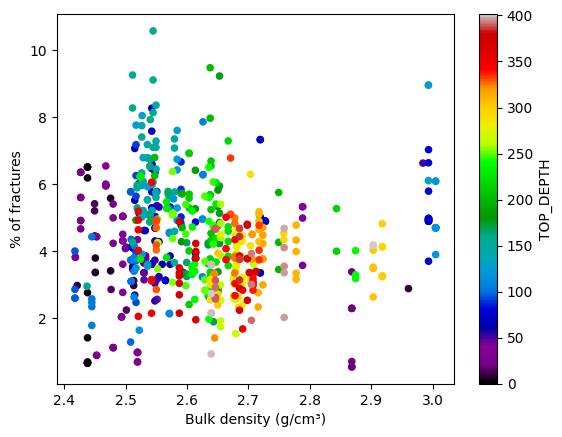

In [9]:
fig2_df.plot.scatter(y='% of fractures', x='Bulk density (g/cm³)', c='TOP_DEPTH', cmap='nipy_spectral')

,% of fractures,Bulk density (g/cm³),Bulk detrend,fracdiff,fracdiffmean,fracmean
% of fractures,1.000000,-0.033947,0.009993,0.462602,0.642166,0.512475
Bulk density (g/cm³),-0.033947,1.000000,0.918171,0.021437,-0.054463,-0.135106
Bulk detrend,0.009993,0.918171,1.000000,0.026485,-0.030936,-0.051267
fracdiff,0.462602,0.021437,0.026485,1.000000,0.415000,-0.032424
fracdiffmean,0.642166,-0.054463,-0.030936,0.415000,1.000000,0.059439
fracmean,0.512475,-0.135106,-0.051267,-0.032424,0.059439,1.000000


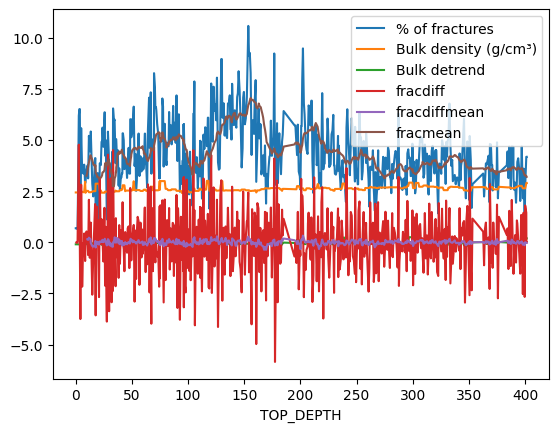

In [10]:
import scipy.signal as signal

bulk = fig2_df[['% of fractures','Bulk density (g/cm³)', 'TOP_DEPTH']].drop_duplicates().dropna().copy()

bulk['Bulk detrend'] =  signal.detrend(bulk['Bulk density (g/cm³)'].values, type='linear')
bulk['fracdiff'] = bulk['% of fractures'].diff()
bulk['fracdiffmean'] = bulk['% of fractures'].diff().rolling(20).mean()
bulk['fracmean'] = bulk['% of fractures'].rolling(20).mean()
bulk.set_index('TOP_DEPTH', inplace=True)
bulk.plot()
bulk.corr()

(400.0, 0.0)

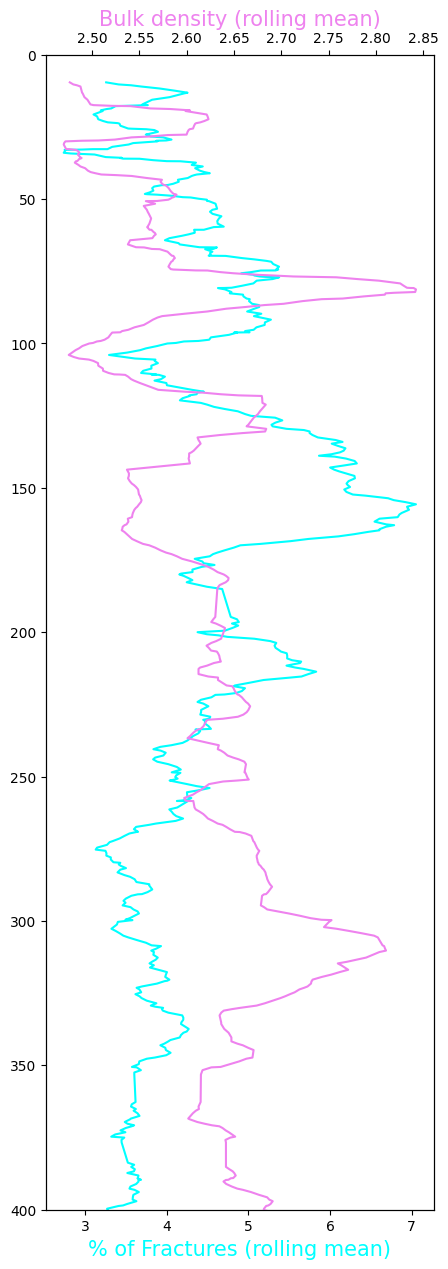

In [11]:
fig, ax = plt.subplots(figsize=(5,15))

ax.plot(bulk['fracmean'], bulk.index, color='cyan')
ax.set_xlabel('% of Fractures (rolling mean)', fontsize=15, color='cyan')

ax2 = ax.twiny()

ax2.plot(bulk['Bulk density (g/cm³)'].rolling(20).mean(), bulk.index, color='violet')
ax2.set_xlabel('Bulk density (rolling mean)', fontsize=15, color='violet')

ax.set_ylim(400, 0)

In [12]:
bulk125 = bulk.reset_index()
bulk125 = bulk125[bulk125.TOP_DEPTH < 125]
bulk125.corr()

,TOP_DEPTH,% of fractures,Bulk density (g/cm³),Bulk detrend,fracdiff,fracdiffmean,fracmean
TOP_DEPTH,1.000000,0.267973,0.251627,0.125898,-0.003703,-0.017136,0.480928
% of fractures,0.267973,1.000000,0.129023,0.095659,0.484862,0.677293,0.301706
Bulk density (g/cm³),0.251627,0.129023,1.000000,0.991776,-0.003755,-0.071103,0.282943
Bulk detrend,0.125898,0.095659,0.991776,1.000000,-0.003234,-0.070051,0.225558
fracdiff,-0.003703,0.484862,-0.003755,-0.003234,1.000000,0.401424,-0.044208
fracdiffmean,-0.017136,0.677293,-0.071103,-0.070051,0.401424,1.000000,0.073197
fracmean,0.480928,0.301706,0.282943,0.225558,-0.044208,0.073197,1.000000


<Axes: >

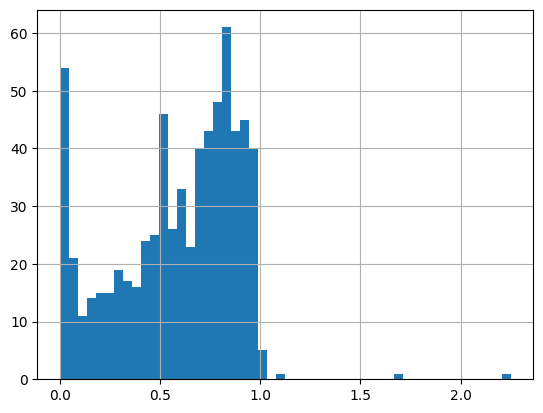

In [13]:
fig2_df.TOP_DEPTH.dropna().diff().hist(bins=50)

# Figure 3

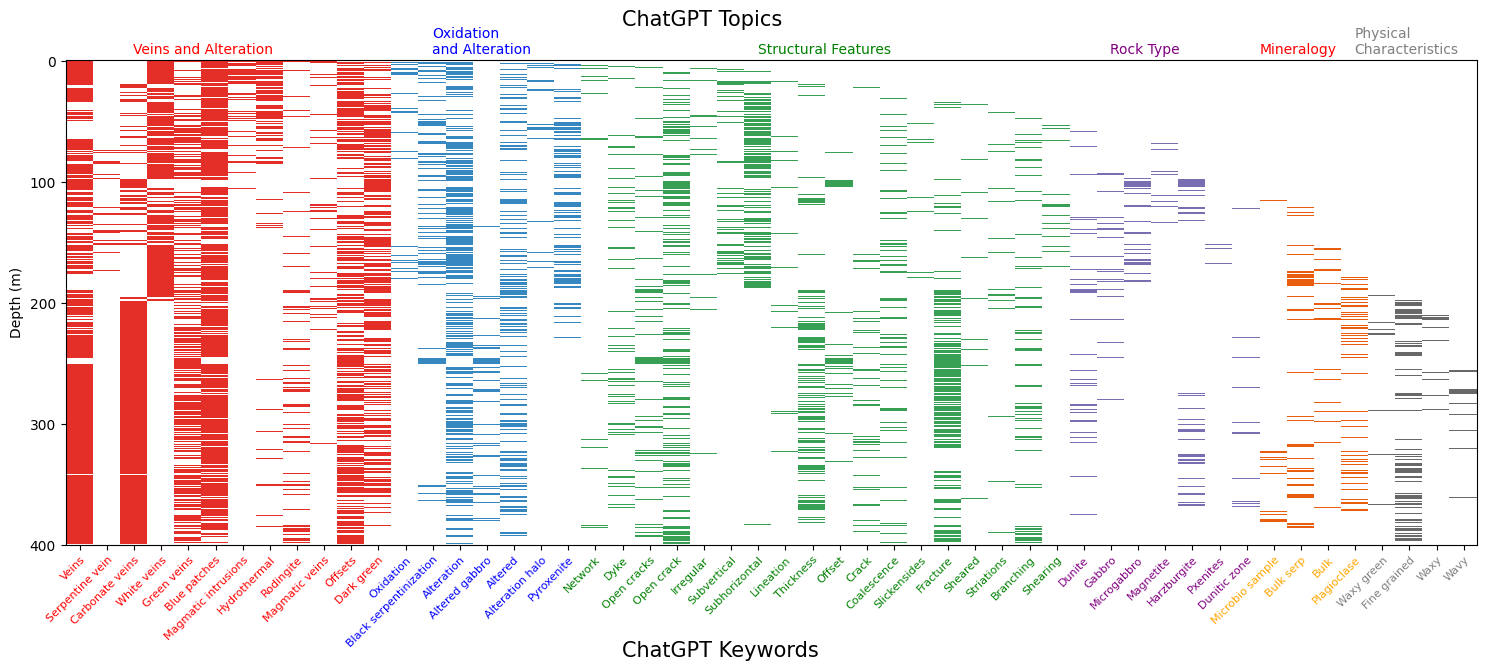

In [14]:
keywords=df.columns[49:]
K=[]
for i in keywords:
    K.append(i)

# plot the graph keyword.

data = df[K].to_numpy()
# row_labels = L
row_labels = df.index
col_labels = K

groups = [
    ['Veins', 'Serpentine vein', 'Carbonate veins', 'White veins', 'Green veins',
     'Blue patches', 'Magmatic veins', 'Dark green', 'Magmatic intrusions',
     'Hydrothermal', 'Offsets', 'Rodingite'],
    ['Oxidation', 'Black serpentinization', 'Alteration', 'Alteration halo',
     'Altered gabbro', 'Altered', 'Pyroxenite'],
    ['Network', 'Coalescence', 'Dyke', 'Shearing', 'Crack'
     ,  'Open cracks'
     , 'Open crack', 'Irregular', 'Subvertical',
     'Subhorizontal', 'Lineation', 'Thickness', 'Offset', 'Fracture',
     'Sheared', 'Striations', 'Branching', 'Slickensides'],
    ['Dunite', 'Gabbro', 'Microgabbro', 'Harzburgite', 'Pxenites', 'Dunitic zone','Magnetite'],
    ['Plagioclase', 'Microbio sample', 'Bulk serp', 'Bulk'],
    ['Fine grained', 'Waxy green', 'Waxy', 'Wavy']
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'grey']


sorted_cols = []
group_indices = []
for i, group in enumerate(groups):
    for col in col_labels:
        if col in group:
            sorted_cols.append(col)
            group_indices.append(i)

sorted_data = data[:, [col_labels.index(col) for col in sorted_cols]]

# plt.pcolormesh(sorted_data, cmap='Purples')

fig, ax = plt.subplots(figsize=(15, 7))

def plot_words(x, y, data, cmap):
    xx, yy = np.meshgrid(x, y)
    data[data == 0] = np.nan
    ax.pcolormesh(xx, yy, data, cmap=cmap, vmin=0, vmax=1.5)
    
plot_words(x=np.arange(0, 12, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(0, 12, 1)], cmap='Reds')
plot_words(x=np.arange(12, 12+7, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(12, 12+7, 1)], cmap='Blues')
plot_words(x=np.arange(12+7, 12+7+18, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7, 12+7+18, 1)], cmap='Greens')
plot_words(x=np.arange(12+7+18, 12+7+18+7, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18, 12+7+18+7, 1)], cmap='Purples')
plot_words(x=np.arange(12+7+18+7, 12+7+18+7+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7, 12+7+18+7+4, 1)], cmap='Oranges')
plot_words(x=np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1)], cmap='Greys')
# plot_words(data[:, np.arange(13, 21, 1)], cmap='Blues')
# data1 = sorted_data[:, np.arange(0, 13, 1)]
# data1[data1 == 0] = np.nan
# plt.pcolormesh(data1, cmap='Reds', vmin=0, vmax=1.5)

# y_ticks = np.arange(0, 401.7, 100)
y_ticks = np.arange(0, 401, 100)
y_tick_positions = np.linspace(0, len(row_labels), len(y_ticks))
plt.yticks(y_tick_positions, y_ticks)
ax.set_ylabel('Depth (m)')

plt.xticks(np.arange(len(sorted_cols)) + 0.025, sorted_cols, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)
plt.subplots_adjust(bottom=0.1)

for tick_label in plt.gca().get_xticklabels():
    label = tick_label.get_text()
    for i, group in enumerate(groups):
        if label in group:
            tick_label.set_color(colors[i])

plt.gca().invert_yaxis()

ax.text(s='Veins and Alteration', color='red', x=2, y= -10)
ax.text(s='Oxidation\nand Alteration', color='blue', x=13, y= -10)
ax.text(s='Structural Features', color='green', x=25, y= -10)
ax.text(s='Rock Type', color='purple', x=38, y= -10)
ax.text(s='Mineralogy', color='red', x=43.5, y= -10)
ax.text(s='Physical\nCharacteristics', color='grey', x=47, y= -10)

ax.text(s='ChatGPT Keywords', color='black', x=20, y=850, fontsize=15)
ax.text(s='ChatGPT Topics', color='black', x=20, y=-50, fontsize=15)

fig.tight_layout()

fig.savefig('topics_keywords.pdf', bbox_inches='tight')

# plt.xlabel("Columns")

# plt.show()# plot the graph keyword. For coloring each section of a different color, you have to crop by hand the graph for each color then make a little montage.

In [15]:
df['GRAINSIZE_Cryptocrystalline'].unique()

array([0, 1])

In [16]:
[c for c in df.columns]

columns_dont_use = ['CORE',
 'SECTION',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'Alteration_dummies_50%-90%',
'Alteration_dummies_>90%',
'SECTION_UNIT']

In [17]:
!pip install catboost

In [18]:
def meow(df, X_cols, Y_col):
    
    X = df[X_cols].copy()
    y = df[Y_col].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7
                                                        , random_state=42)

    
    model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=3,
                           verbose=False)
    
    model.fit(X_train, y_train)
        
    # do predictions
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    print('Accuracy:', metrics.accuracy_score(y_test, predictions))
    
    # do ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    plt.hist(probs, bins=50)
    roc_auc = metrics.auc(fpr, tpr)
    print('AUC:', roc_auc)
    
    print('total true', y_test.sum())
    
    return {'fpr':fpr, 'tpr':tpr}

Accuracy: 0.9585921325051759
AUC: 0.9903951798688642
total true 198


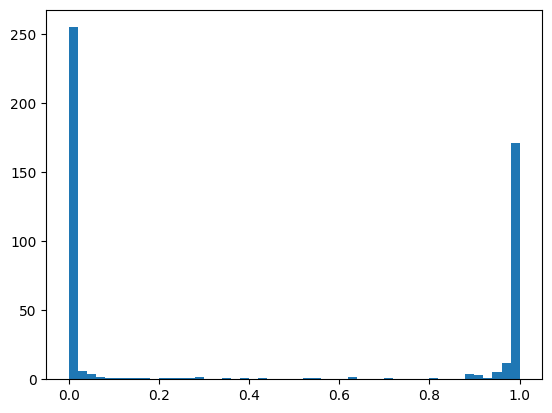

In [19]:
X = df.drop(columns_dont_use, axis=1)
results = meow(df=df, X_cols=X.columns, Y_col='Alteration_dummies_>90%')
# results['ci_df'].pivot_table(index='thresholds', columns='run', values='fpr') #.groupby('run').mean().sort_values(by=['fpr','tpr']).plot(x='fpr', y='tpr')

---catboost for chemistry and biology---
Accuracy: 0.8985507246376812
AUC: 0.9418040049618998
total true 198
---catboost for fractures---
Accuracy: 0.6935817805383023
AUC: 0.7424508240297714
total true 198
---catboost for geology---
Accuracy: 0.927536231884058
AUC: 0.9852117667907142
total true 198
---catboost for physics---
Accuracy: 0.8592132505175983
AUC: 0.8979797979797981
total true 198
---catboost for chatgpt---
Accuracy: 0.8592132505175983
AUC: 0.9268651426546164
total true 198
---catboost for other---
Accuracy: 0.855072463768116
AUC: 0.9242069821017189
total true 198


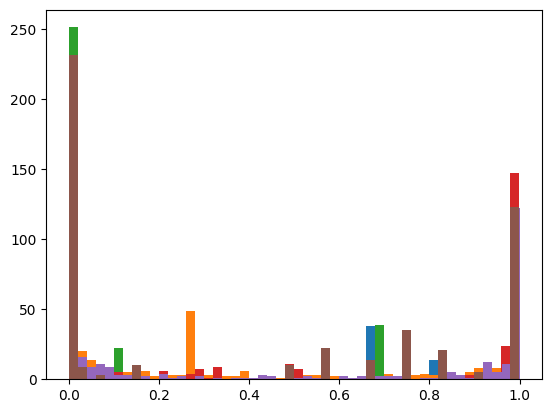

In [20]:
chemistry_biology = ['Cell abundance (cells/g)','LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
]
print('---catboost for chemistry and biology---')
cb = meow(df=df, X_cols=chemistry_biology, Y_col='Alteration_dummies_>90%')

fractures = ['% of fractures',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]
print('---catboost for fractures---')
frac = meow(df=df, X_cols=fractures, Y_col='Alteration_dummies_>90%')

geology = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',]
print('---catboost for geology---')
geo = meow(df=df, X_cols=geology, Y_col='Alteration_dummies_>90%')

physics = ['Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',]
print('---catboost for physics---')
phys = meow(df=df, X_cols=physics, Y_col='Alteration_dummies_>90%')

chatgpt = [ 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
           'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',]
print('---catboost for chatgpt---')
gpt = meow(df=df, X_cols=chatgpt, Y_col='Alteration_dummies_>90%')


other = ['Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']
print('---catboost for other---')
oth = meow(df=df, X_cols=other, Y_col='Alteration_dummies_>90%')


In [21]:
# def plot_with_ci(fpr, tpr, label, color, ax):
#     ax.plot(fpr, tpr, label=label, color=color)
#     n_bootstraps = fpr.shape[0]
#     rng = np.random.RandomState(42)
#     bs_scores = []
    
#     for i in range(n_bootstraps):
#         indices = rng.randint(0, len(y_

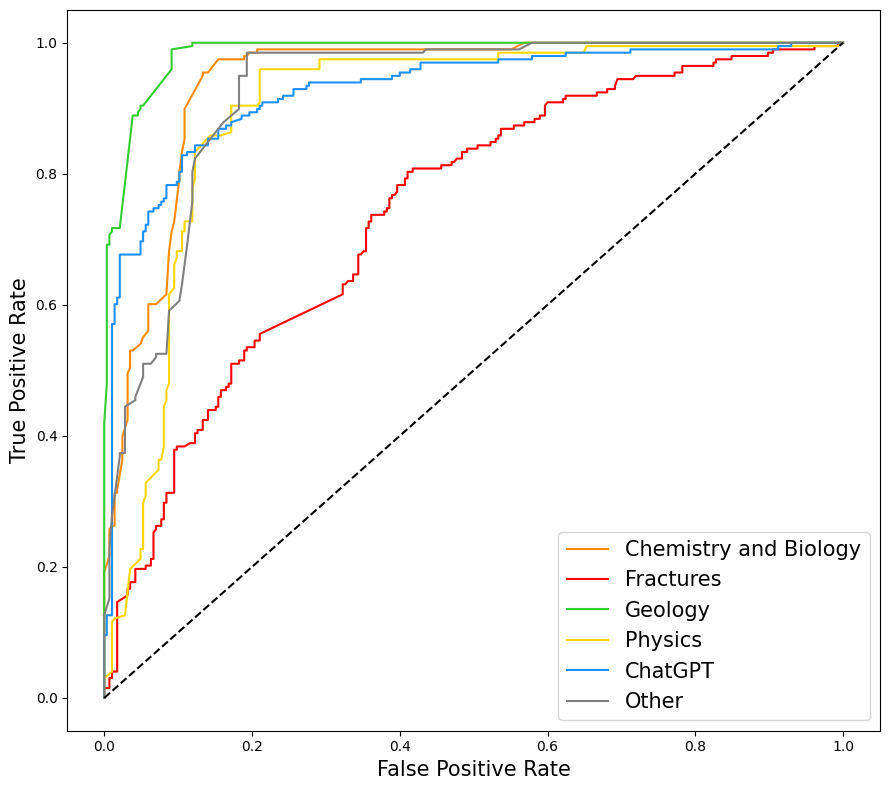

In [22]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(cb['fpr'], cb['tpr'], label='Chemistry and Biology', color='darkorange')
ax.plot(frac['fpr'], frac['tpr'], color='red', label='Fractures')
ax.plot(geo['fpr'], geo['tpr'], color='limegreen', label='Geology')
ax.plot(phys['fpr'], phys['tpr'], color='gold', label='Physics')
ax.plot(gpt['fpr'], gpt['tpr'], color='dodgerblue', label='ChatGPT')
ax.plot(oth['fpr'], oth['tpr'], color='grey', label='Other')
ax.plot((0, 1), (0, 1), linestyle='--', color='black')

ax.legend(fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
fig.tight_layout()
fig.savefig('roc.pdf', bbox_inches='tight')

In [23]:
[c for c in df.columns]

['CORE',
 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 'SECTION_UNIT',
 '% of fractures',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 'Alterat

In [24]:
geo_comp = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3t', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', '100*Fe(III)/FeT'
            , 'Vrecal', 'Crrecal', 'Co', 'Nirecal', 'Curecal', 'Znrecal', 'Srrecal']

physical_props = ['Mean dry electrical Resistivity (ohmm)', 'Bulk density (g/cm³)', 'AMS bulk susceptibility'
                  , 'LOI wt%', 'CO2 wt%', 'H20 wt%', 'CaCO3 calc']

bio = ['Cell abundance (cells/g)',]

fractures = ['% of fractures', 'PnS2_sum', 'PnL_sum', 'PnP3V_sum', 'PnP3H_sum', 'PnP4_sum', 'PnP6V_sum'
             , 'FnS2_sum', 'FnL_sum', 'FnP3V_sum', 'FnP3H_sum', 'FnP4_sum', 'FnP6V_sum']

rock_type = ['UNIT_TYPE_Dunite', 'UNIT_TYPE_Fault rock', 'UNIT_TYPE_Gabbro', 'UNIT_TYPE_Harzburgite'
             , 'UNIT_TYPE_Metagabbro', 'UNIT_TYPE_Other', 'UNIT_CLASS_OPHIO', 'UNIT_CLASS_UND']

textural = ['TEXTURES_Brecciated', 'TEXTURES_Sheared', 'GRAINSIZE_Cryptocrystalline', 'GRAINSIZE_Fine grained'
            , 'GRAINSIZE_Medium grained', 'GRAINSIZE_Microcrystalline', 'GRAINSIZE2_Coarse grained'
            , 'GRAINSIZE2_Cryptocrystalline', 'GRAINSIZE2_Fine grained', 'GRAINSIZE2_Medium grained', 'GRAINSIZE2_Pegmatitic']

color_viz = ['Redness', 'Greenness', 'Blueness', 'Y (luminance)']

---gpt geo comp---
Accuracy: 0.8757763975155279
AUC: 0.9290625553783448
total true 198
---gpt physical props---
Accuracy: 0.8799171842650103
AUC: 0.9175615807194755
total true 198
---gpt bio---
Accuracy: 0.8923395445134575
AUC: 0.9510455431508064
total true 198
---gpt fractures---
Accuracy: 0.6935817805383023
AUC: 0.7424508240297714
total true 198
---gpt rock type---
Accuracy: 0.9130434782608695
AUC: 0.917224880382775
total true 198
---gpt textural---
Accuracy: 0.8716356107660456
AUC: 0.887586390217969
total true 198
---gpt color visualization---
Accuracy: 0.8488612836438924
AUC: 0.9233120680489101
total true 198


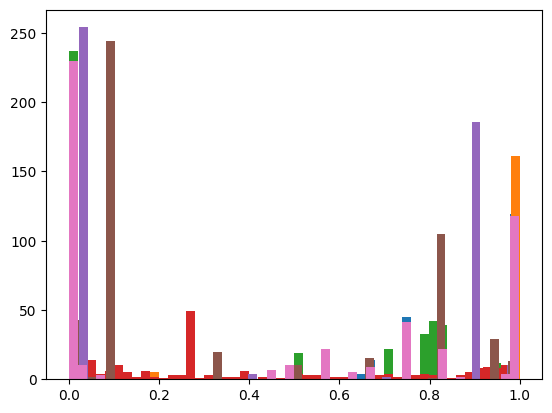

In [25]:
print('---gpt geo comp---')
gc_cb = meow(df=df, X_cols=geo_comp, Y_col='Alteration_dummies_>90%')

print('---gpt physical props---')
ph_cb = meow(df=df, X_cols=physical_props, Y_col='Alteration_dummies_>90%')

print('---gpt bio---')
bi_cb = meow(df=df, X_cols=bio, Y_col='Alteration_dummies_>90%')

print('---gpt fractures---')
fr_cb = meow(df=df, X_cols=fractures, Y_col='Alteration_dummies_>90%')

print('---gpt rock type---')
rt_cb = meow(df=df, X_cols=rock_type, Y_col='Alteration_dummies_>90%')

print('---gpt textural---')
tx_cb = meow(df=df, X_cols=textural, Y_col='Alteration_dummies_>90%')

print('---gpt color visualization---')
cv_cb = meow(df=df, X_cols=color_viz, Y_col='Alteration_dummies_>90%')

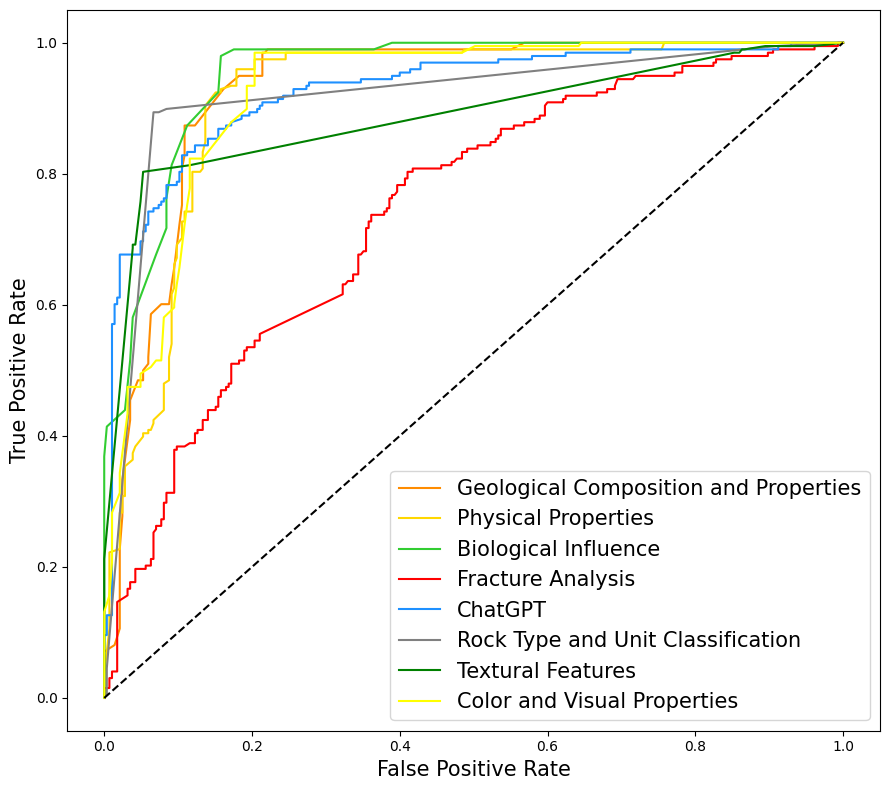

In [26]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(gc_cb['fpr'], gc_cb['tpr'], label='Geological Composition and Properties', color='darkorange')
ax.plot(ph_cb['fpr'], ph_cb['tpr'], color='gold', label='Physical Properties')
ax.plot(bi_cb['fpr'], bi_cb['tpr'], color='limegreen', label='Biological Influence')
ax.plot(fr_cb['fpr'], fr_cb['tpr'], color='red', label='Fracture Analysis')
ax.plot(gpt['fpr'], gpt['tpr'], color='dodgerblue', label='ChatGPT')
ax.plot(rt_cb['fpr'], rt_cb['tpr'], color='grey', label='Rock Type and Unit Classification')
ax.plot(tx_cb['fpr'], tx_cb['tpr'], color='green', label='Textural Features')
ax.plot(cv_cb['fpr'], cv_cb['tpr'], color='yellow', label='Color and Visual Properties')
ax.plot((0, 1), (0, 1), linestyle='--', color='black')

ax.legend(fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
fig.tight_layout()
fig.savefig('roc_using_gpt_classifications.pdf', bbox_inches='tight')

<Axes: >

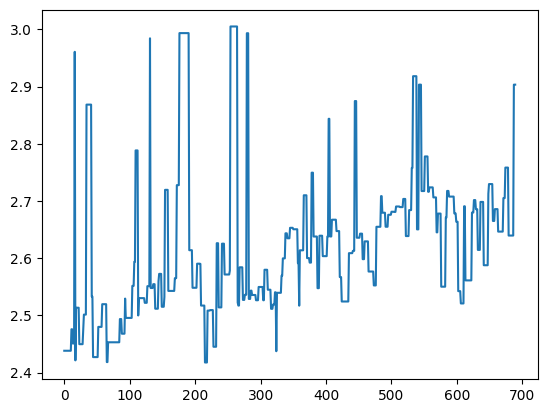

In [31]:
df['Bulk density (g/cm³)'].plot()

In [39]:
xvars = [
    # 'CORE',
 # 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 # 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 # 'SECTION_UNIT',
 '% of fractures',
 # 'IMAGES',
 # 'SEGMENTATION',
 # 'TOP_DEPTH',
 # 'ALTERATION',
 # 'REMARKS1',
 # 'REMARKS2',
 # 'REMARKS4',
 # 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 'Alteration_dummies_50%-90%',
 'Alteration_dummies_>90%',
 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
 'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',
 'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
 'Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']

In [55]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[xvars]
y = df['Bulk density (g/cm³)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the CatBoost regressor
catboost_reg = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')

# Fit the model to the training data
catboost_reg.fit(X_train, y_train, verbose=100)

# Predict on the test data
y_pred = catboost_reg.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('r2 score:', r2_score(y_test, y_pred))

0:	learn: 0.1222762	total: 3.62ms	remaining: 3.62s
100:	learn: 0.0225230	total: 187ms	remaining: 1.66s
200:	learn: 0.0103179	total: 363ms	remaining: 1.44s
300:	learn: 0.0057442	total: 541ms	remaining: 1.25s
400:	learn: 0.0035133	total: 714ms	remaining: 1.07s
500:	learn: 0.0023495	total: 891ms	remaining: 887ms
600:	learn: 0.0016212	total: 1.06s	remaining: 706ms
700:	learn: 0.0011470	total: 1.24s	remaining: 528ms
800:	learn: 0.0008416	total: 1.42s	remaining: 352ms
900:	learn: 0.0006503	total: 1.59s	remaining: 175ms
999:	learn: 0.0005063	total: 1.77s	remaining: 0us
Mean Squared Error: 0.0037854328903319493
r2 score: 0.7957564372536419


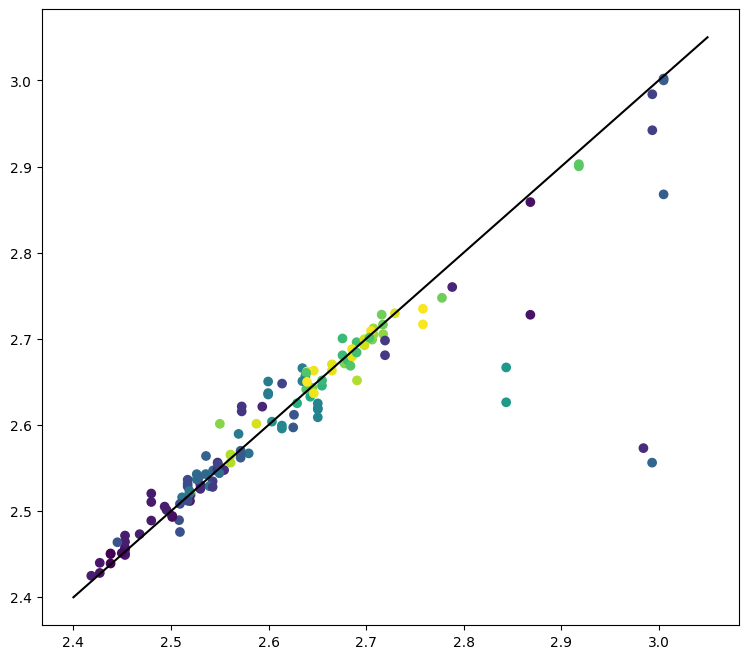

In [67]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.scatter(y_test, y_pred, c=df['TOP_DEPTH'].loc[y_test.index])
# ax.scatter(y_train, catboost_reg.predict(X_train), marker='x', c=df['TOP_DEPTH'].loc[y_train.index])
ax.plot([2.4, 3.05], [2.4, 3.05], color='black')

<BarContainer object of 115 artists>

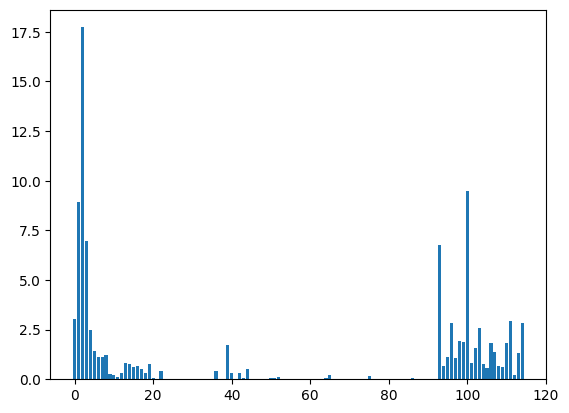

In [61]:
plt.bar(np.arange(0, catboost_reg.feature_importances_.shape[0], 1), catboost_reg.feature_importances_)

<Axes: >

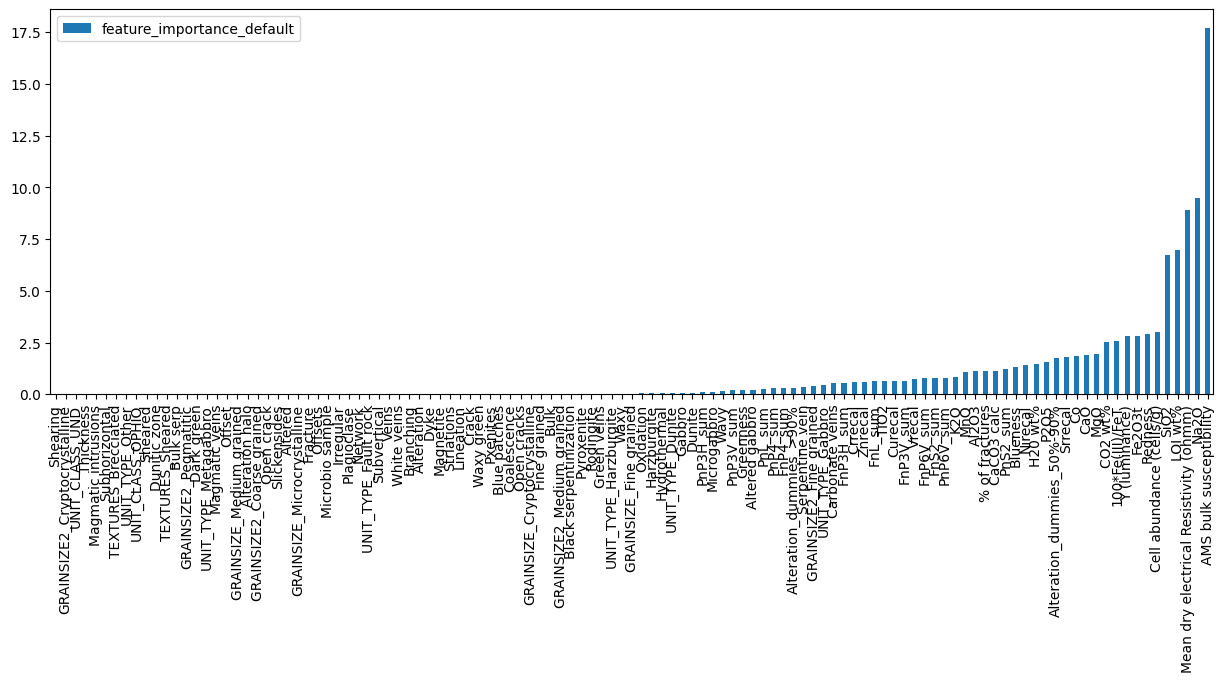

In [65]:
feature_df = pd.DataFrame({'feature_importance_default':catboost_reg.feature_importances_}, index=X_train.columns)
feature_df.sort_values('feature_importance_default').plot.bar(figsize=(15, 5))

In [69]:
!pip install shap

  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 15.0 MB/s eta 0:00:00
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 32.9 MB/s eta 0:00:0000:0100:01


In [70]:
import shap


In [71]:
shap.initjs()


In [72]:
explainer = shap.TreeExplainer(catboost_reg)
shap_values = explainer(X)

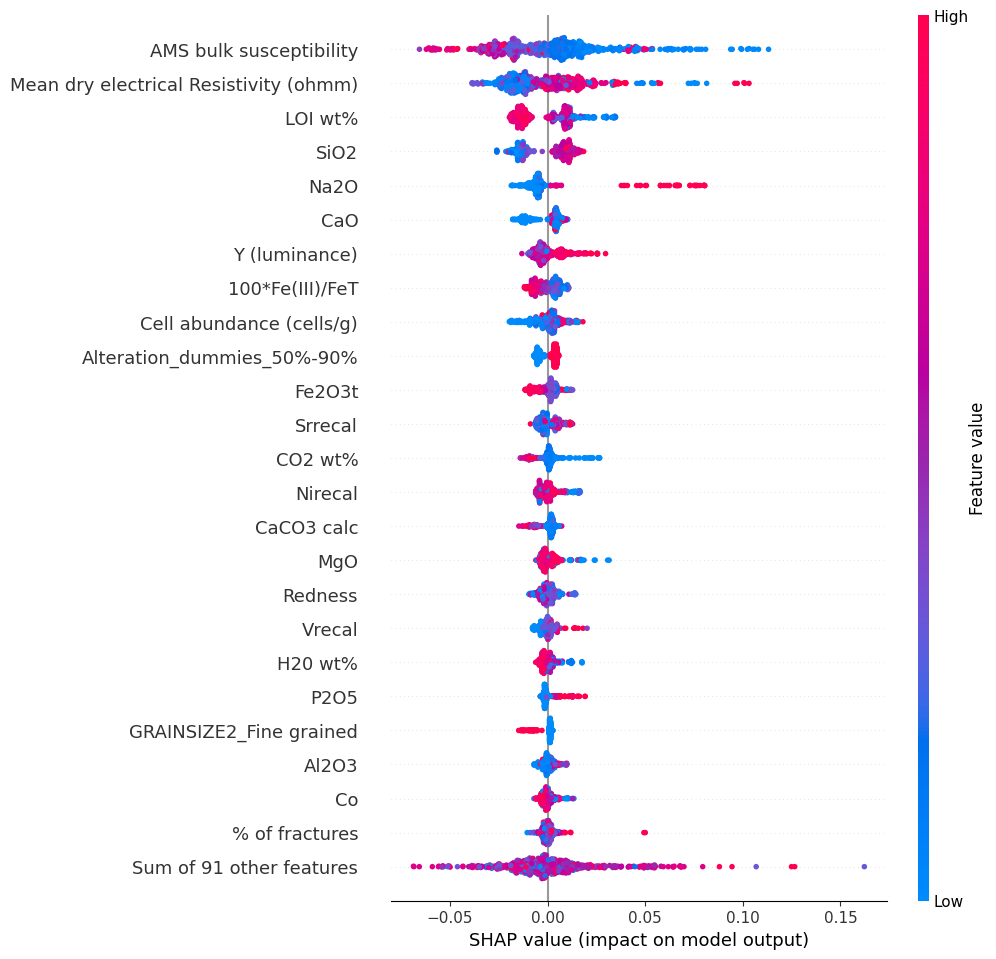

In [75]:
shap.plots.beeswarm(shap_values, max_display=25)


In [86]:
# shap_df = pd.Da taFrame({'shap_value':shap_values.values})#, columns=X.columns, index=df['TOP_DEPTH'])
shap_df = pd.DataFrame( columns=X.columns, index=df['TOP_DEPTH'])
# shap_df.values = shap_values.values
for n, c in enumerate(X.columns):
    shap_df[c] = shap_values.values[:,n]

shap_df

,Cell abundance (cells/g),Mean dry electrical Resistivity (ohmm),AMS bulk susceptibility,LOI wt%,CO2 wt%,H20 wt%,CaCO3 calc,% of fractures,PnS2_sum,PnL_sum,...,Crrecal,Co,Nirecal,Curecal,Znrecal,Srrecal,Redness,Greenness,Blueness,Y (luminance)
TOP_DEPTH,,,,,,,,,,,,,,,,,,,,,
0.00,0.001201,0.002285,-0.048147,-0.013063,-0.009502,-0.002325,-0.009605,-0.002100,-0.000176,-0.000094,...,-0.003541,-0.003342,-0.003250,-0.002049,0.001089,-0.001603,-0.003837,-0.000760,-0.000819,0.001238
0.50,0.001040,0.002094,-0.048086,-0.013046,-0.009385,-0.002318,-0.009609,-0.002182,-0.000298,-0.000173,...,-0.003460,-0.003284,-0.003295,-0.002157,0.001062,-0.001568,-0.003856,-0.000744,-0.000835,0.001224
0.91,0.000777,0.001615,-0.049333,-0.013027,-0.009736,-0.002331,-0.009053,-0.001616,0.000145,-0.000964,...,-0.003689,-0.003275,-0.003423,-0.002228,0.001659,-0.001193,-0.003552,-0.000740,-0.000894,0.001696
1.19,0.000666,0.001612,-0.046021,-0.013028,-0.009049,-0.002333,-0.008974,-0.001740,0.000077,-0.000949,...,-0.003799,-0.003412,-0.003756,-0.002149,0.000993,-0.001632,-0.003867,-0.000726,-0.000935,0.001214
1.60,0.000907,0.002207,-0.048446,-0.013038,-0.009093,-0.002404,-0.009132,-0.001716,0.000120,-0.000988,...,-0.003351,-0.003364,-0.003416,-0.002091,0.001114,-0.001190,-0.003906,-0.000729,-0.000869,0.001244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399.65,0.002955,-0.009148,-0.020891,0.013272,0.000618,0.001179,0.002164,-0.001211,-0.000432,-0.000423,...,-0.000062,-0.000986,0.000399,0.000012,0.000503,0.002601,0.000348,-0.000517,0.001398,0.010481
400.10,0.001299,-0.009222,-0.019349,0.010699,0.000451,0.001278,0.001934,-0.000623,-0.000113,0.000529,...,-0.000121,-0.001158,0.000565,-0.000006,0.000941,0.002132,0.001060,-0.000463,0.001375,0.009557
401.09,-0.001413,0.002736,0.046117,0.017187,-0.000250,0.007514,0.001686,0.001861,0.002564,0.000715,...,0.000456,0.004622,0.010015,0.001189,0.002998,0.011813,0.006125,0.000908,0.007114,0.022073


In [97]:
shap_df['% of fractures']

TOP_DEPTH
0.00     -0.002100
0.50     -0.002182
0.91     -0.001616
1.19     -0.001740
1.60     -0.001716
            ...   
399.65   -0.001211
400.10   -0.000623
401.09    0.001861
401.19    0.001581
401.43    0.001685
Name: % of fractures, Length: 690, dtype: float64